# ARCDAP-3 ESMValTool Worksheet 

---
## Module 3 (Solutions)
---

In [ ]:
# created by Gerald on 17 Jan 2020

# copy & paste the ESM_Worksheets folder into the ~/ESMValtool/ directory and open it there.

Welcome to Module 3 of the ESMValTool Worksheet designed for the hands-on sessions during the ARCDAP-3 workshop. Module 3 will involve running the Climate Variability Diagnostics Package (CVDP) via ESMValTool to evaluate certain ENSO metrics. Please only start this worksheet after you've completed Module 1, 1+ and 2. 

Enter your details in the cell below:

In [ ]:
# Name: 
# Organisation: 
# GCMs used: 

In [1]:
#imports 

import numpy as np
import scipy as sp
import xarray as xr

from IPython.display import Image, display

import fnmatch # find match

import glob
from pprint import pprint
from pathlib import Path

## Task 3. Climate Processes: ENSO and IOD

--- 
**Data and Scripts needed:** <br>
Model and Observation output: <br>
- 2 x CMIP6 Models + 1 x ERA-Interim <br>
- CMIP experiment: historical <br>
- Variables: tas, ts, pr, psl <br>
- Frequency: Monthly mean <br>

Recipe: *~/ESMValTool/esmvaltool/recipes/recipe_cvdp.yml* <br>
Script: *~/miniconda3/envs/esmvaltool/lib/python 3.7/site-packages/esmvaltool/diag_scripts/cvdp/cvdp/driver.ncl*

---

We now move on to using ESMValTool for the evaluation of important climate processes in GCMs. Of great importance to the ASEAN region are the El Nino Southern Oscillation (ENSO) and the Indian Ocean Dipole (IOD), generally characterised by irregularly periodic oscillations in sea-surface temperatures (SSTs) that cause anomalous variations in temperature and precipitation over the region. 

This exercise will involve the use of the Climate Variability Diagnostics Package (CVDP), an analysis tool that documents major modes of climate variability such as ENSO, Northern and Southern Annular Modes (NAO/SAO) which has been ported to ESMValTool for use via the same recipe structure. You can read more about this recipe [here](https://esmvaltool.readthedocs.io/en/latest/recipes/recipe_cvdp.html). You will, by the end of this exercise, plotted and calculated trends in ENSO indices such as Nino 3, 3.4, 4 and the IOD and SST metrics from your assigned CMIP GCMs. 

### T3.1. Configure the *recipe_cvdp.yml* file 

CVDP is a relatively powerful ESMValTool recipe that generates a large number of files and plots. The first tasks will involve configuring the recipe and diagnostic script (written in NCL) so that the recipe evaluates only the climate processes that we want *(this is also to prevent an overly-long programme run time)*. 


1. Inspect and edit this recipe yml’s file which is found in the same *~/ESMValTool/esmvaltool/recipes* folder to correctly include your assigned CMIP6 models and ERA-Interim. Set the start and end years to 1979 and 2014 respectively. Recall that CMIP6 output files have an additional "grid" key and remember that you can find information about the required "keys" in the .nc file names (see "Instructions" from Module 1). Your ERA-Interim data should be declared as: 

     ```- {dataset: ERA-Interim,  project: OBS6,  type: reanaly,  version: 1,  start_year: 1979,  end_year: 2014,  tier: 3}```

2. Add the highlighted lines below the ```datasets``` to regrid the data to a common 1.5x1.5 grid. Also add the line ```preprocessor: pp_rad``` below ```mip: Amon``` where the variables are declared. 

<img src='Images/cvdp_mod_recipe.jpg' width="300">

### T3.2. Configure the diagnostic *cvdp_wrapper.py* script

1. Next, open the *~/miniconda3/envs/esmvaltool/lib/python 3.7/site-packages/esmvaltool/diag_scripts/cvdp/cvdp/driver.ncl* file. This is part of the CVDP code itself that's written in NCL. This driver script is where one can configure user-adjustable options for the CVDP. You can read more about CVDP in its [documentation](http://www.cesm.ucar.edu/working_groups/CVC/cvdp/files/CVDP_readme_v500.pdf). 

In [3]:
# Insert the required file 
!geany home/arcdap/miniconda3/envs/esmvaltool/lib/python 3.7/site-packages/esmvaltool/diag_scripts/cvdp/cvdp/driver.ncl

^C


You’d first want to configure the CVDP such that it does not run all CVDP scripts (which is the default setting). Doing so can take over an hour of computation time for just one model! 

2. To turn this option off, scroll down to under ```---Advanced Options----------``` and change the option for ```modular``` (line 58) from ```"False"``` to ```"True"```.  
3. The option directly below, ```modular_list```, allows you to state which CVDP scripts you wish to run, e.g. the default scripts are ```“pdo, aice.trends_timeseries, sst.indices”```. For the list of available scripts, scroll down to line 72 (```complete_list```). As we’re only interested in the SST diagnostics for this exercise, select the scripts with ```“sst”``` in them such that your line 61 should say: 

```modular_list = “sst.indices, sst.mean_stddev, sst.trends_timeseries” ;``` ...(other extra unchanged code)

You’re now set to run CVDP in ESMValTool! 

### T3.3. Create plots of your SST, ENSO and IOD metrics using ESMValTool

1. Run the *recipe_cvdp.yml* script in the code cell as before. (This programme with the modified *driver.ncl* file should take anywhere between a few - 20 minutes to complete depending on your laptop speed, but check occasionally if any errors occur) 

In [ ]:
# Insert the code to run the cvdp recipe here 
! esmvaltool config-user-example.yml esmvaltool/recipes/recipe_cvdp.yml

2. Upon the completion of the ESMValTool programme, navigate to this programme’s output folder and then to the */work* sub-folder. You should see all the plots that CVDP has produced along with some provenance files (not important for this exercise). You will analyse these plots in the following questions.  (Note that the CVDP's plots being saved to the */work* is just a known flaw in the current ESMValTool version)

**If you are getting an empty file or listing, check that you have entered the correct directory**. 

In [2]:
# List the output directory here 
! ls esmvaltool_output/

recipe_cvdp_20191213_172749
recipe_cvdp_20191213_173441
recipe_cvdp_20191214_122333
recipe_cvdp_20200116_075447
recipe_python_20200117_070100
recipe_validation_CMIP6_20191213_221918
recipe_validation_CMIP6_20191214_020427
recipe_validation_CMIP6_20191214_022739
recipe_validation_CMIP6_20191214_023144
recipe_validation_CMIP6_20191215_230454
recipe_validation_CMIP6_20191215_230902
recipe_validation_CMIP6_20191216_044746_INDOPAC
recipe_validation_CMIP6_20191216_071113
recipe_validation_CMIP6_20191216_071431
recipe_validation_CMIP6_20191216_073610
recipe_validation_CMIP6_20191216_074228
recipe_validation_CMIP6_20191216_090333
recipe_validation_CMIP6_20191216_092147
recipe_validation_CMIP6_20191216_095212
recipe_validation_CMIP6_20191216_101648
recipe_validation_CMIP6_20191216_102142
recipe_validation_CMIP6_20200116_031130
recipe_validation_CMIP6_20200116_031207
recipe_validation_CMIP6_20200116_031243


You can list all the .png plot files generated by CVDP using the familiar code structure below:

In [7]:
home = str(Path.home())  #Your home directory

# Insert the sub-folder containing the recipe output into the ''
# e.g. dirname1='recipe_python_20200117_070100'
dirname1='recipe_cvdp_20200116_075447';  
# Full path of the folder containing the plots produced by the recipe 
# Insert also the required path after dirname1
dirname=home+'/ESMValTool/esmvaltool_output/'+ dirname1 +'/work/diagnostic1/cvdp/';

# List of .png image files in the dirname directory
listing = glob.glob(dirname+'*.png')

pprint(listing)

['/home/arcdap/ESMValTool/esmvaltool_output/recipe_cvdp_20200116_075447/work/diagnostic1/cvdp/sst.trends.son.png',
 '/home/arcdap/ESMValTool/esmvaltool_output/recipe_cvdp_20200116_075447/work/diagnostic1/cvdp/nino4.timeseries.png',
 '/home/arcdap/ESMValTool/esmvaltool_output/recipe_cvdp_20200116_075447/work/diagnostic1/cvdp/sst.timeseries.mam.png',
 '/home/arcdap/ESMValTool/esmvaltool_output/recipe_cvdp_20200116_075447/work/diagnostic1/cvdp/nino3.timeseries.png',
 '/home/arcdap/ESMValTool/esmvaltool_output/recipe_cvdp_20200116_075447/work/diagnostic1/cvdp/socn.timeseries.png',
 '/home/arcdap/ESMValTool/esmvaltool_output/recipe_cvdp_20200116_075447/work/diagnostic1/cvdp/nino34.powspec.png',
 '/home/arcdap/ESMValTool/esmvaltool_output/recipe_cvdp_20200116_075447/work/diagnostic1/cvdp/iod.timeseries.png',
 '/home/arcdap/ESMValTool/esmvaltool_output/recipe_cvdp_20200116_075447/work/diagnostic1/cvdp/sst.timeseries.ann.png',
 '/home/arcdap/ESMValTool/esmvaltool_output/recipe_cvdp_20200116_07

---
### SSTs
---


### T3.4. Comparison of annual SST mean states and standard deviations


1. In the list of .png files in */work*, you should be able to find the plot for the SST mean state as ***“sst.mean.ann.png”***. Display this plot in the code cell below. Compare and comment on the annual SST mean states between your models and the ERA-Interim reanalysis. 

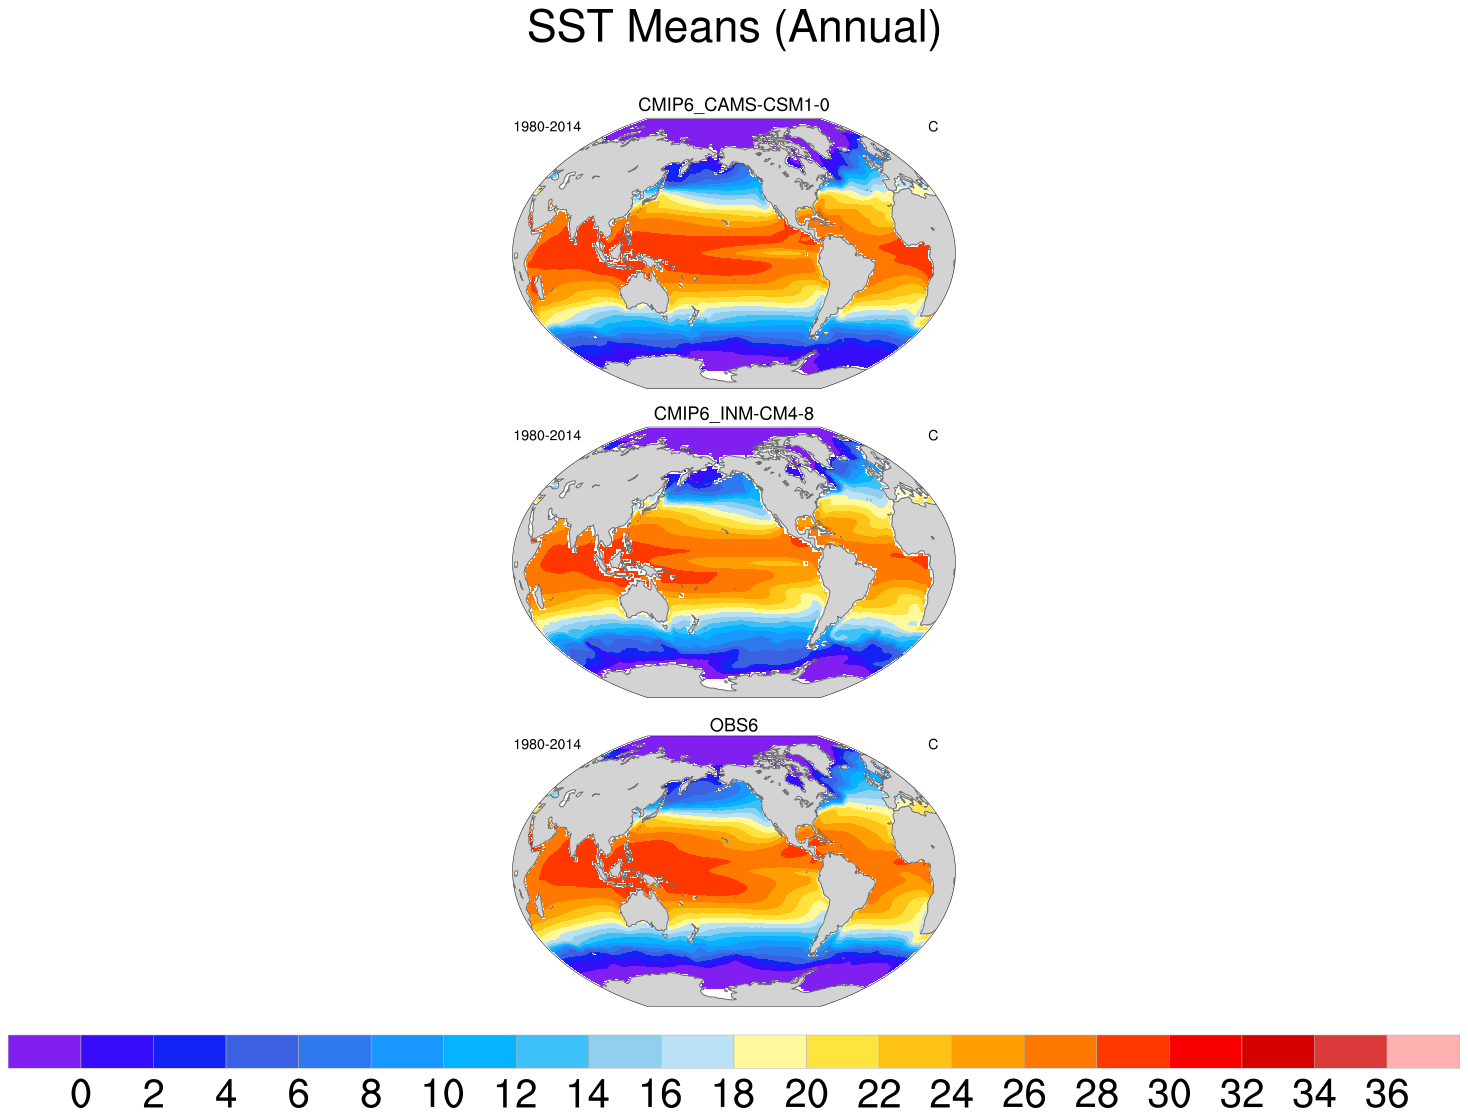

In [9]:
# Display the plots of ann mean SSTs:
# Insert the required filename into ''
display(Image(filename=dirname+'sst.mean.ann.png'))

**Comments:** 

2. Repeat 1. but for the SST standard deviations instead, the required file should be called ***“sst.stddev.ann.png”***. 

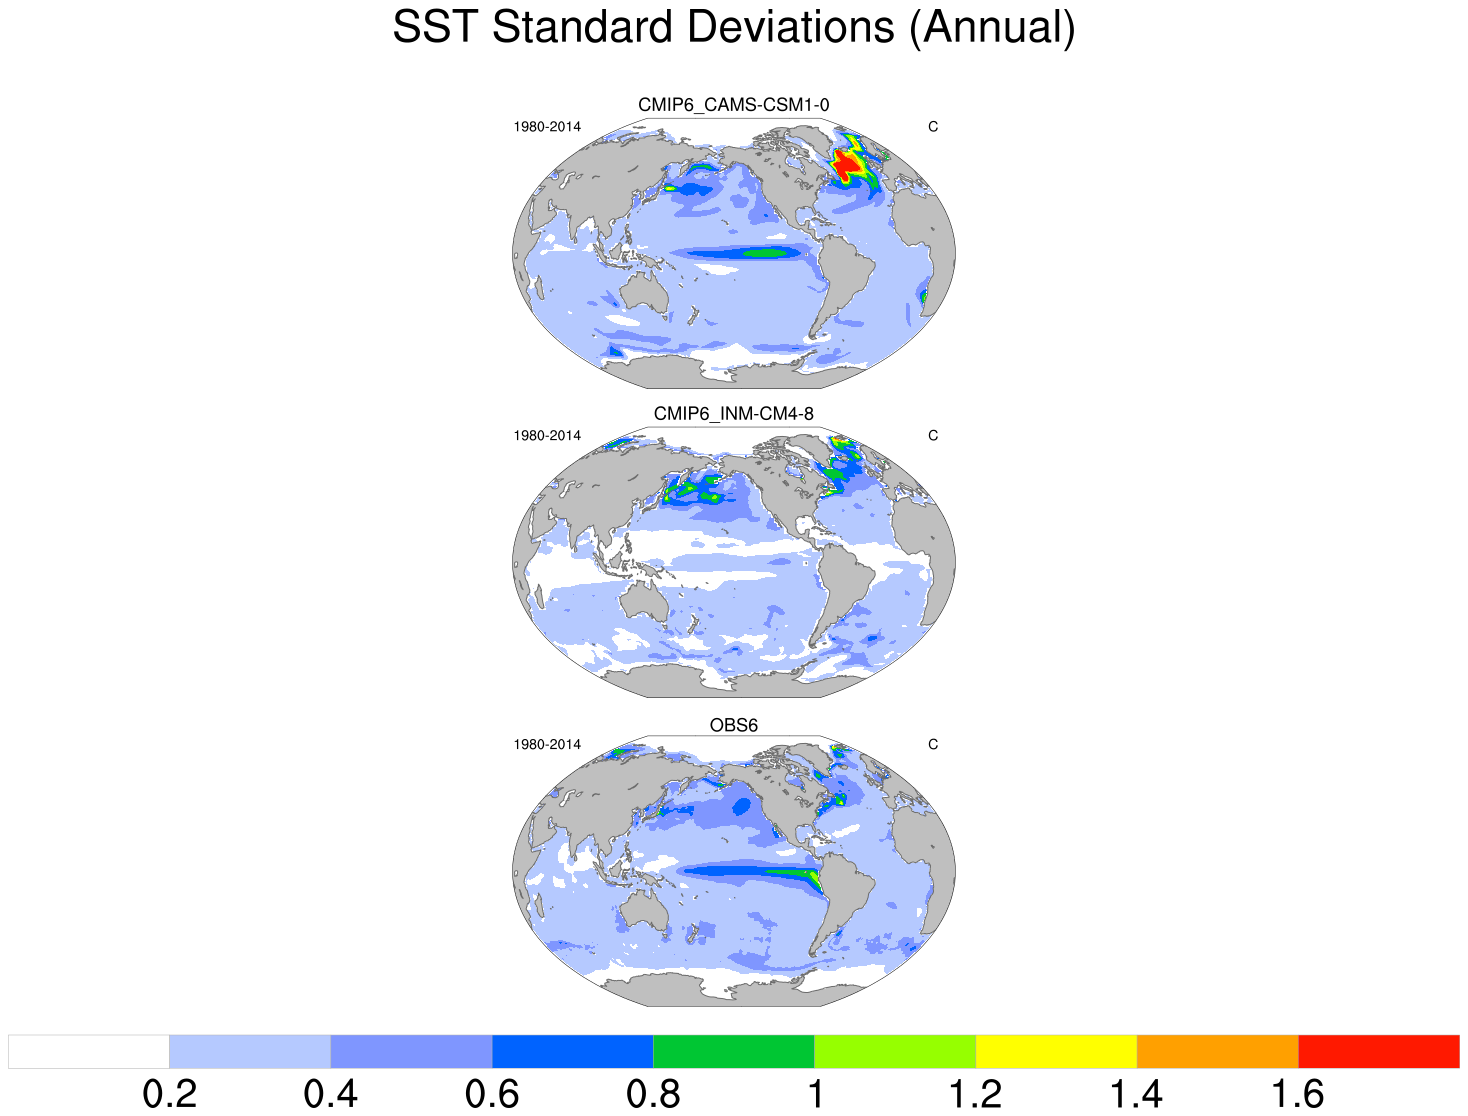

In [10]:
# Display the plots of ann mean SSTs stddevs:

display(Image(filename=dirname+'sst.stddev.ann.png'))

**Comments:**

### T3.5. Comparison of DJF SST mean states and standard deviations

Repeat T3.4. but for the DJF mean states and standard deviations instead. The relevant files should be ***“sst.mean.djf.png”*** and ***“sst.stddev.djf.png”*** respectively. 

In [ ]:
# Display the plots of DJF mean SSTs:

display(Image(filename=dirname+'sst.mean.ann.png'))

**Comments:**

In [ ]:
# Display the plots of DJF mean SSTs stddevs:

display(Image(filename=dirname+'sst.stddev.ann.png'))

**Comments:**

### T3.6. Plot the annual and DJF SST trends

Repeat T3.4. - 3.5. but for the trends in SST over the selected period. The relevant files in /work would be ***“sst.trends.ann.png”*** and ***“sst.trends.djf.png”***. Comment on your findings. 

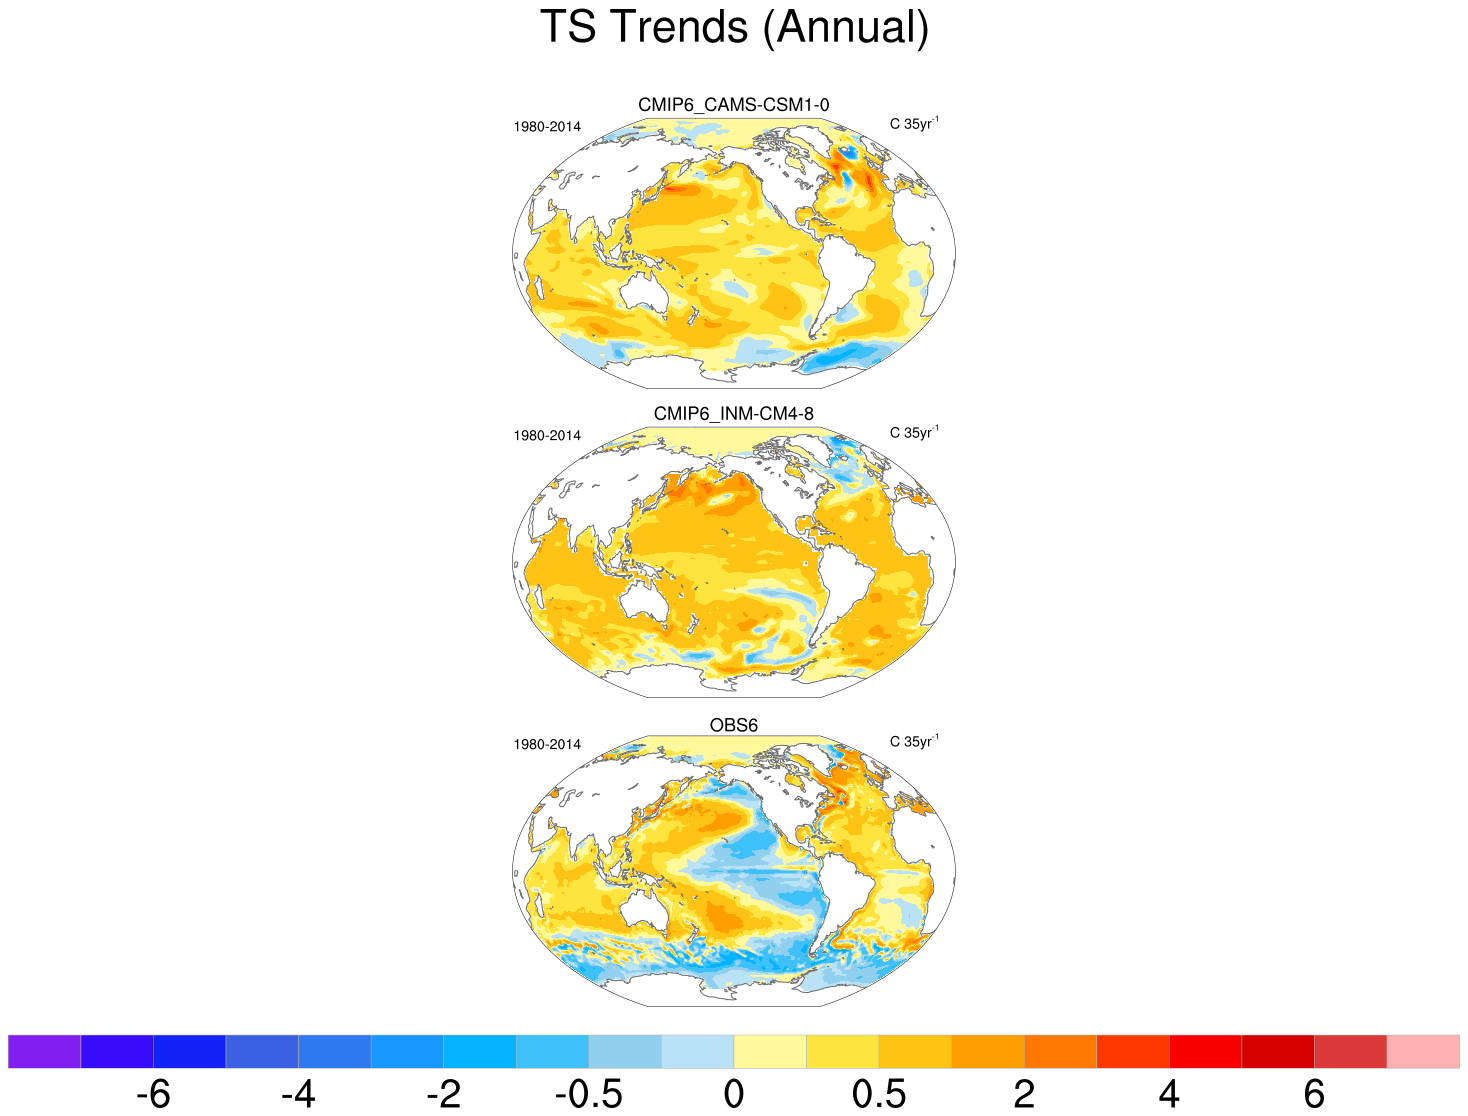

In [11]:
# Display the plots of ann SST trend:

display(Image(filename=dirname+'sst.trends.ann.png'))

**Comments:**

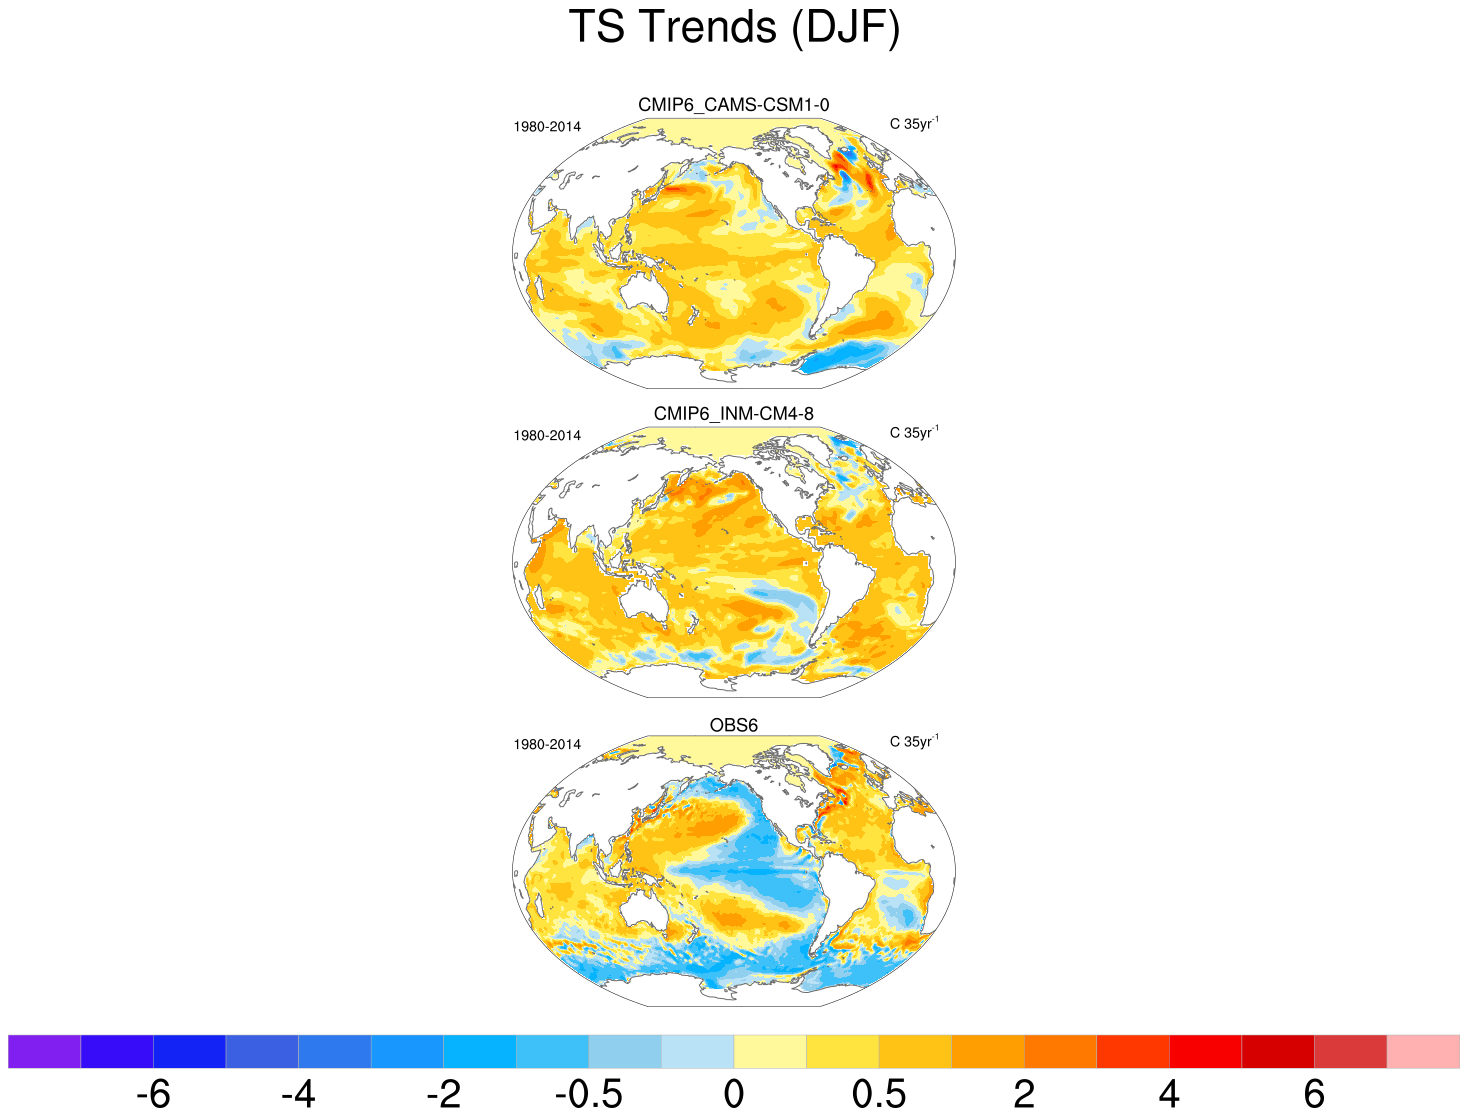

In [12]:
# Display the plots of DJF SST trend:

display(Image(filename=dirname+'sst.trends.djf.png'))

**Comments:**

---
### El Nino Southern Oscillation (ENSO)

---

### T3.7. Plot the Nino 3.4, 3 and 4 time series for your GCMs and ERA-Interim

These plots should be titled ***“nino34.timeseries.png”***, ***“nino3.timeseries.png”*** and ***“nino4.timeseries.png”***. Comment on the time series and trends (given on the top right corner of the plots). 

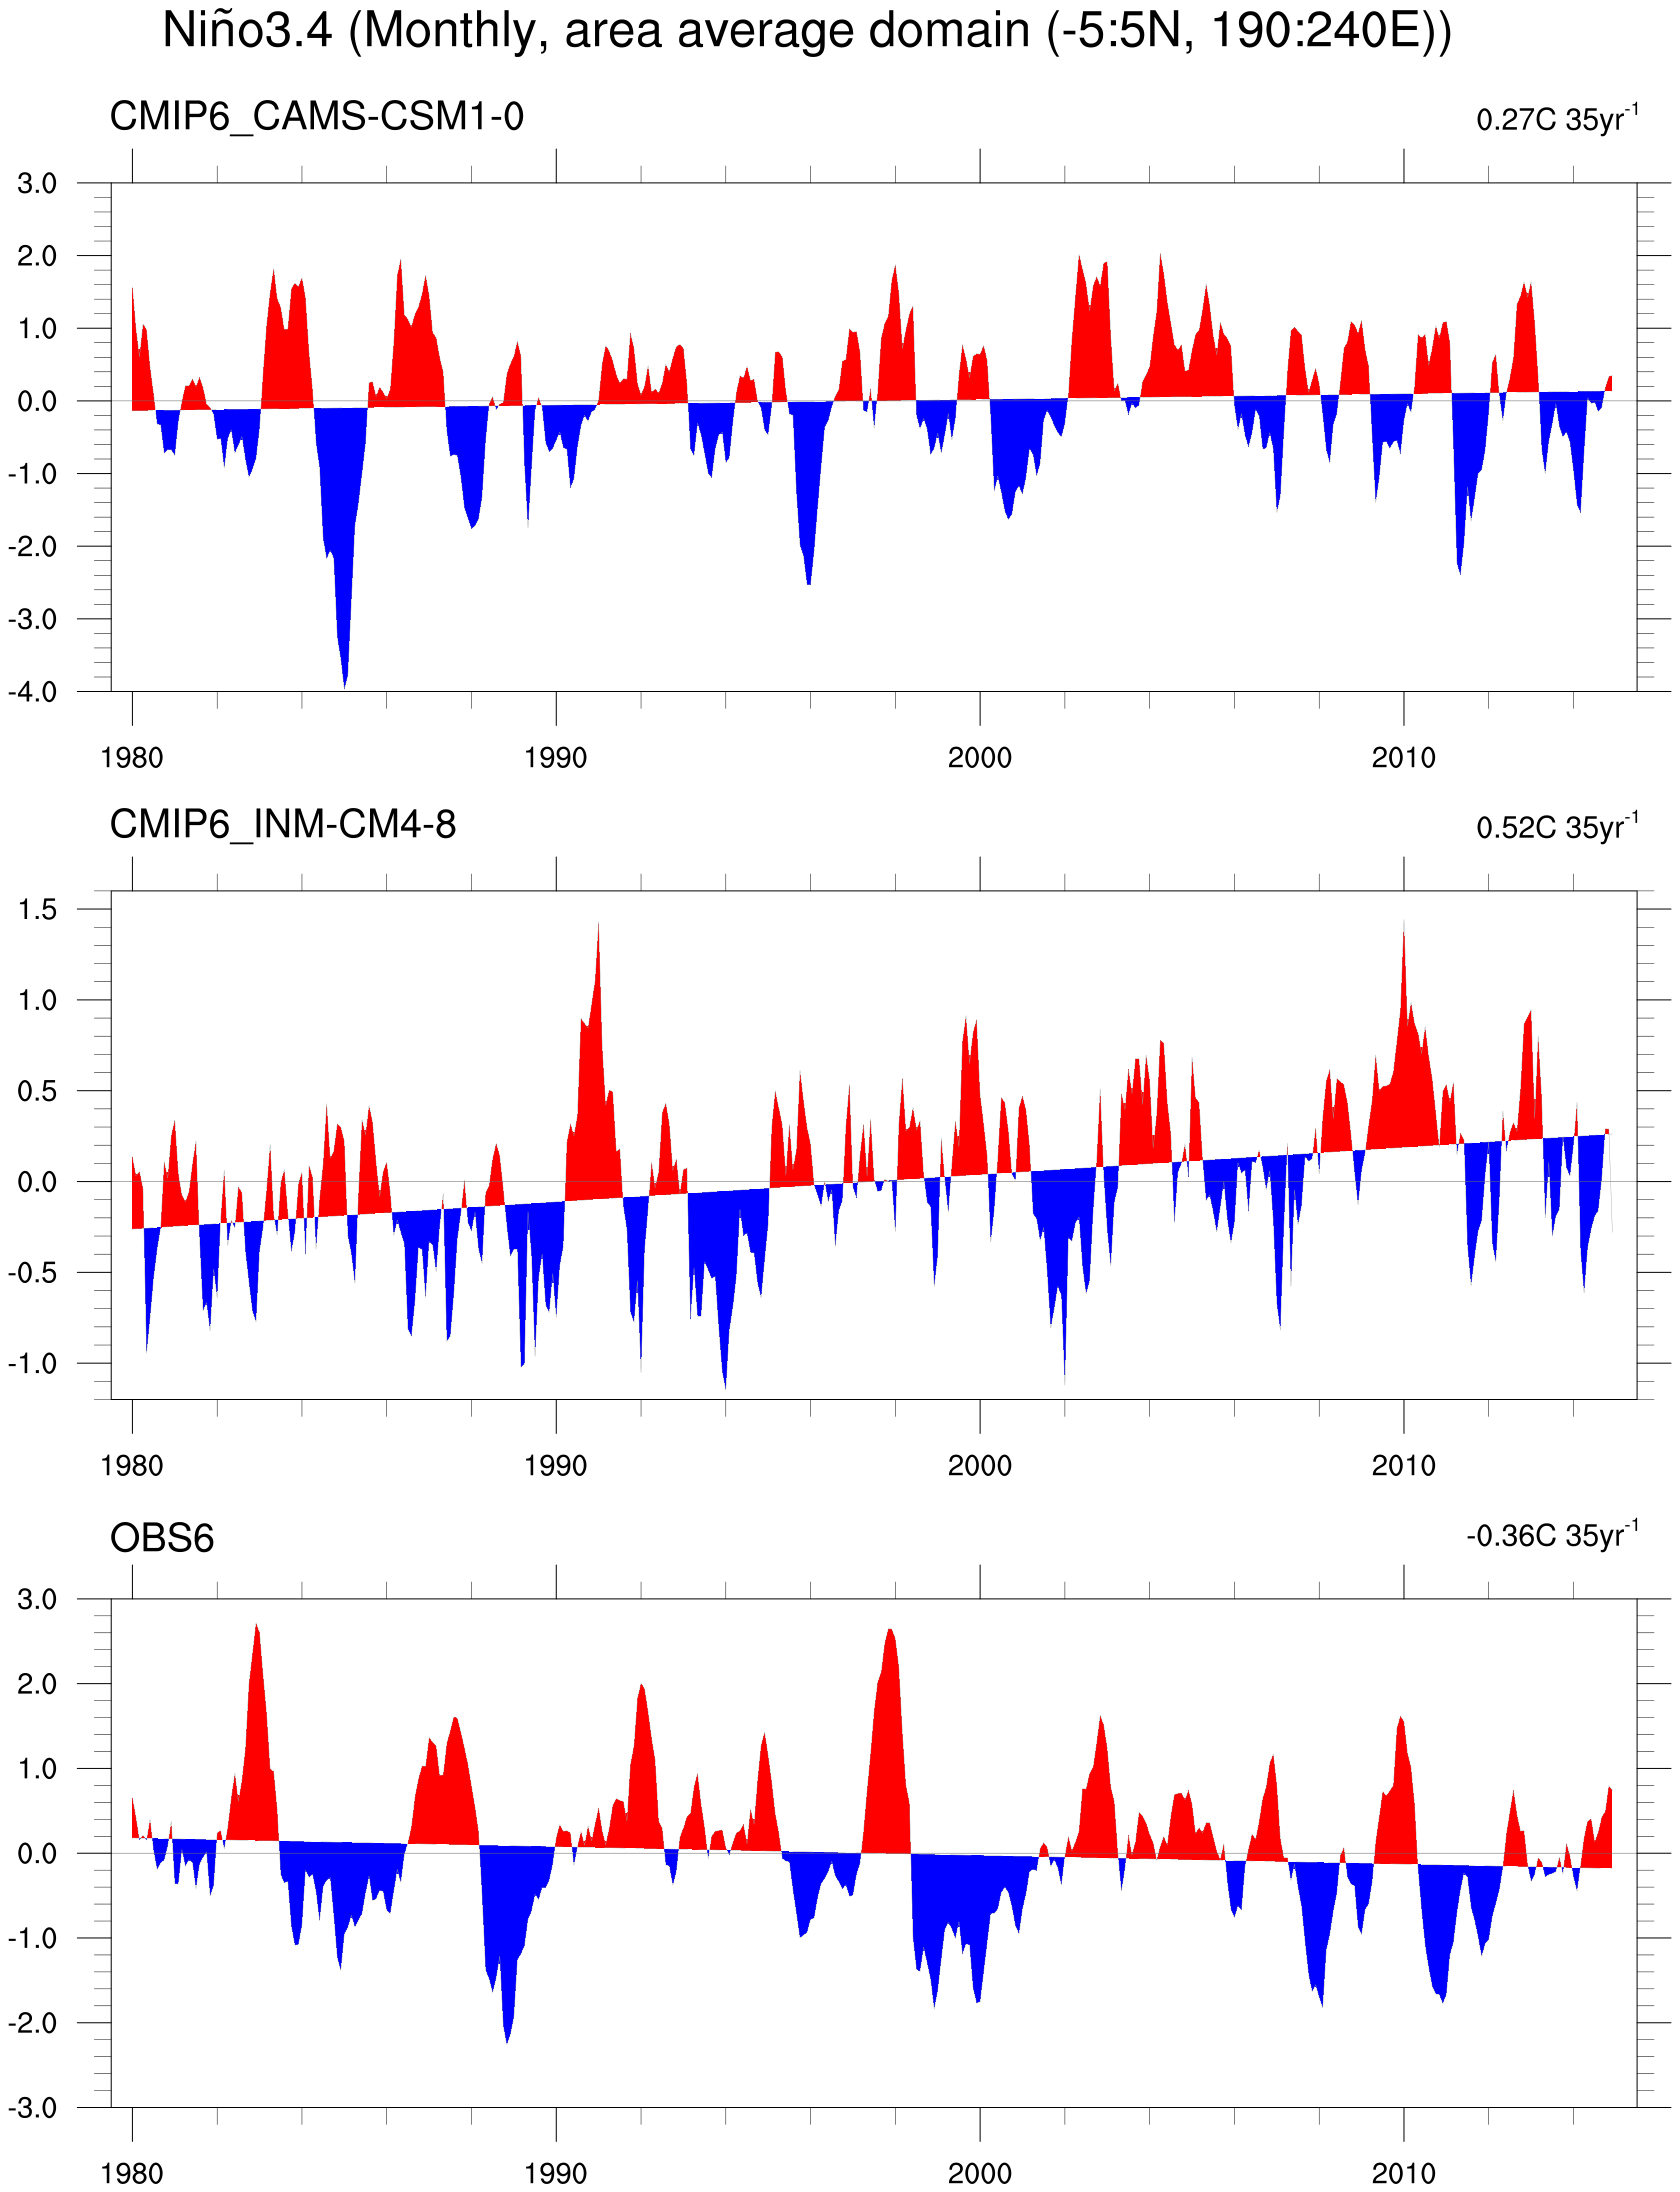

In [14]:
#Nino3.4
display(Image(filename=dirname+'nino34.timeseries.png'))

**Comments:**

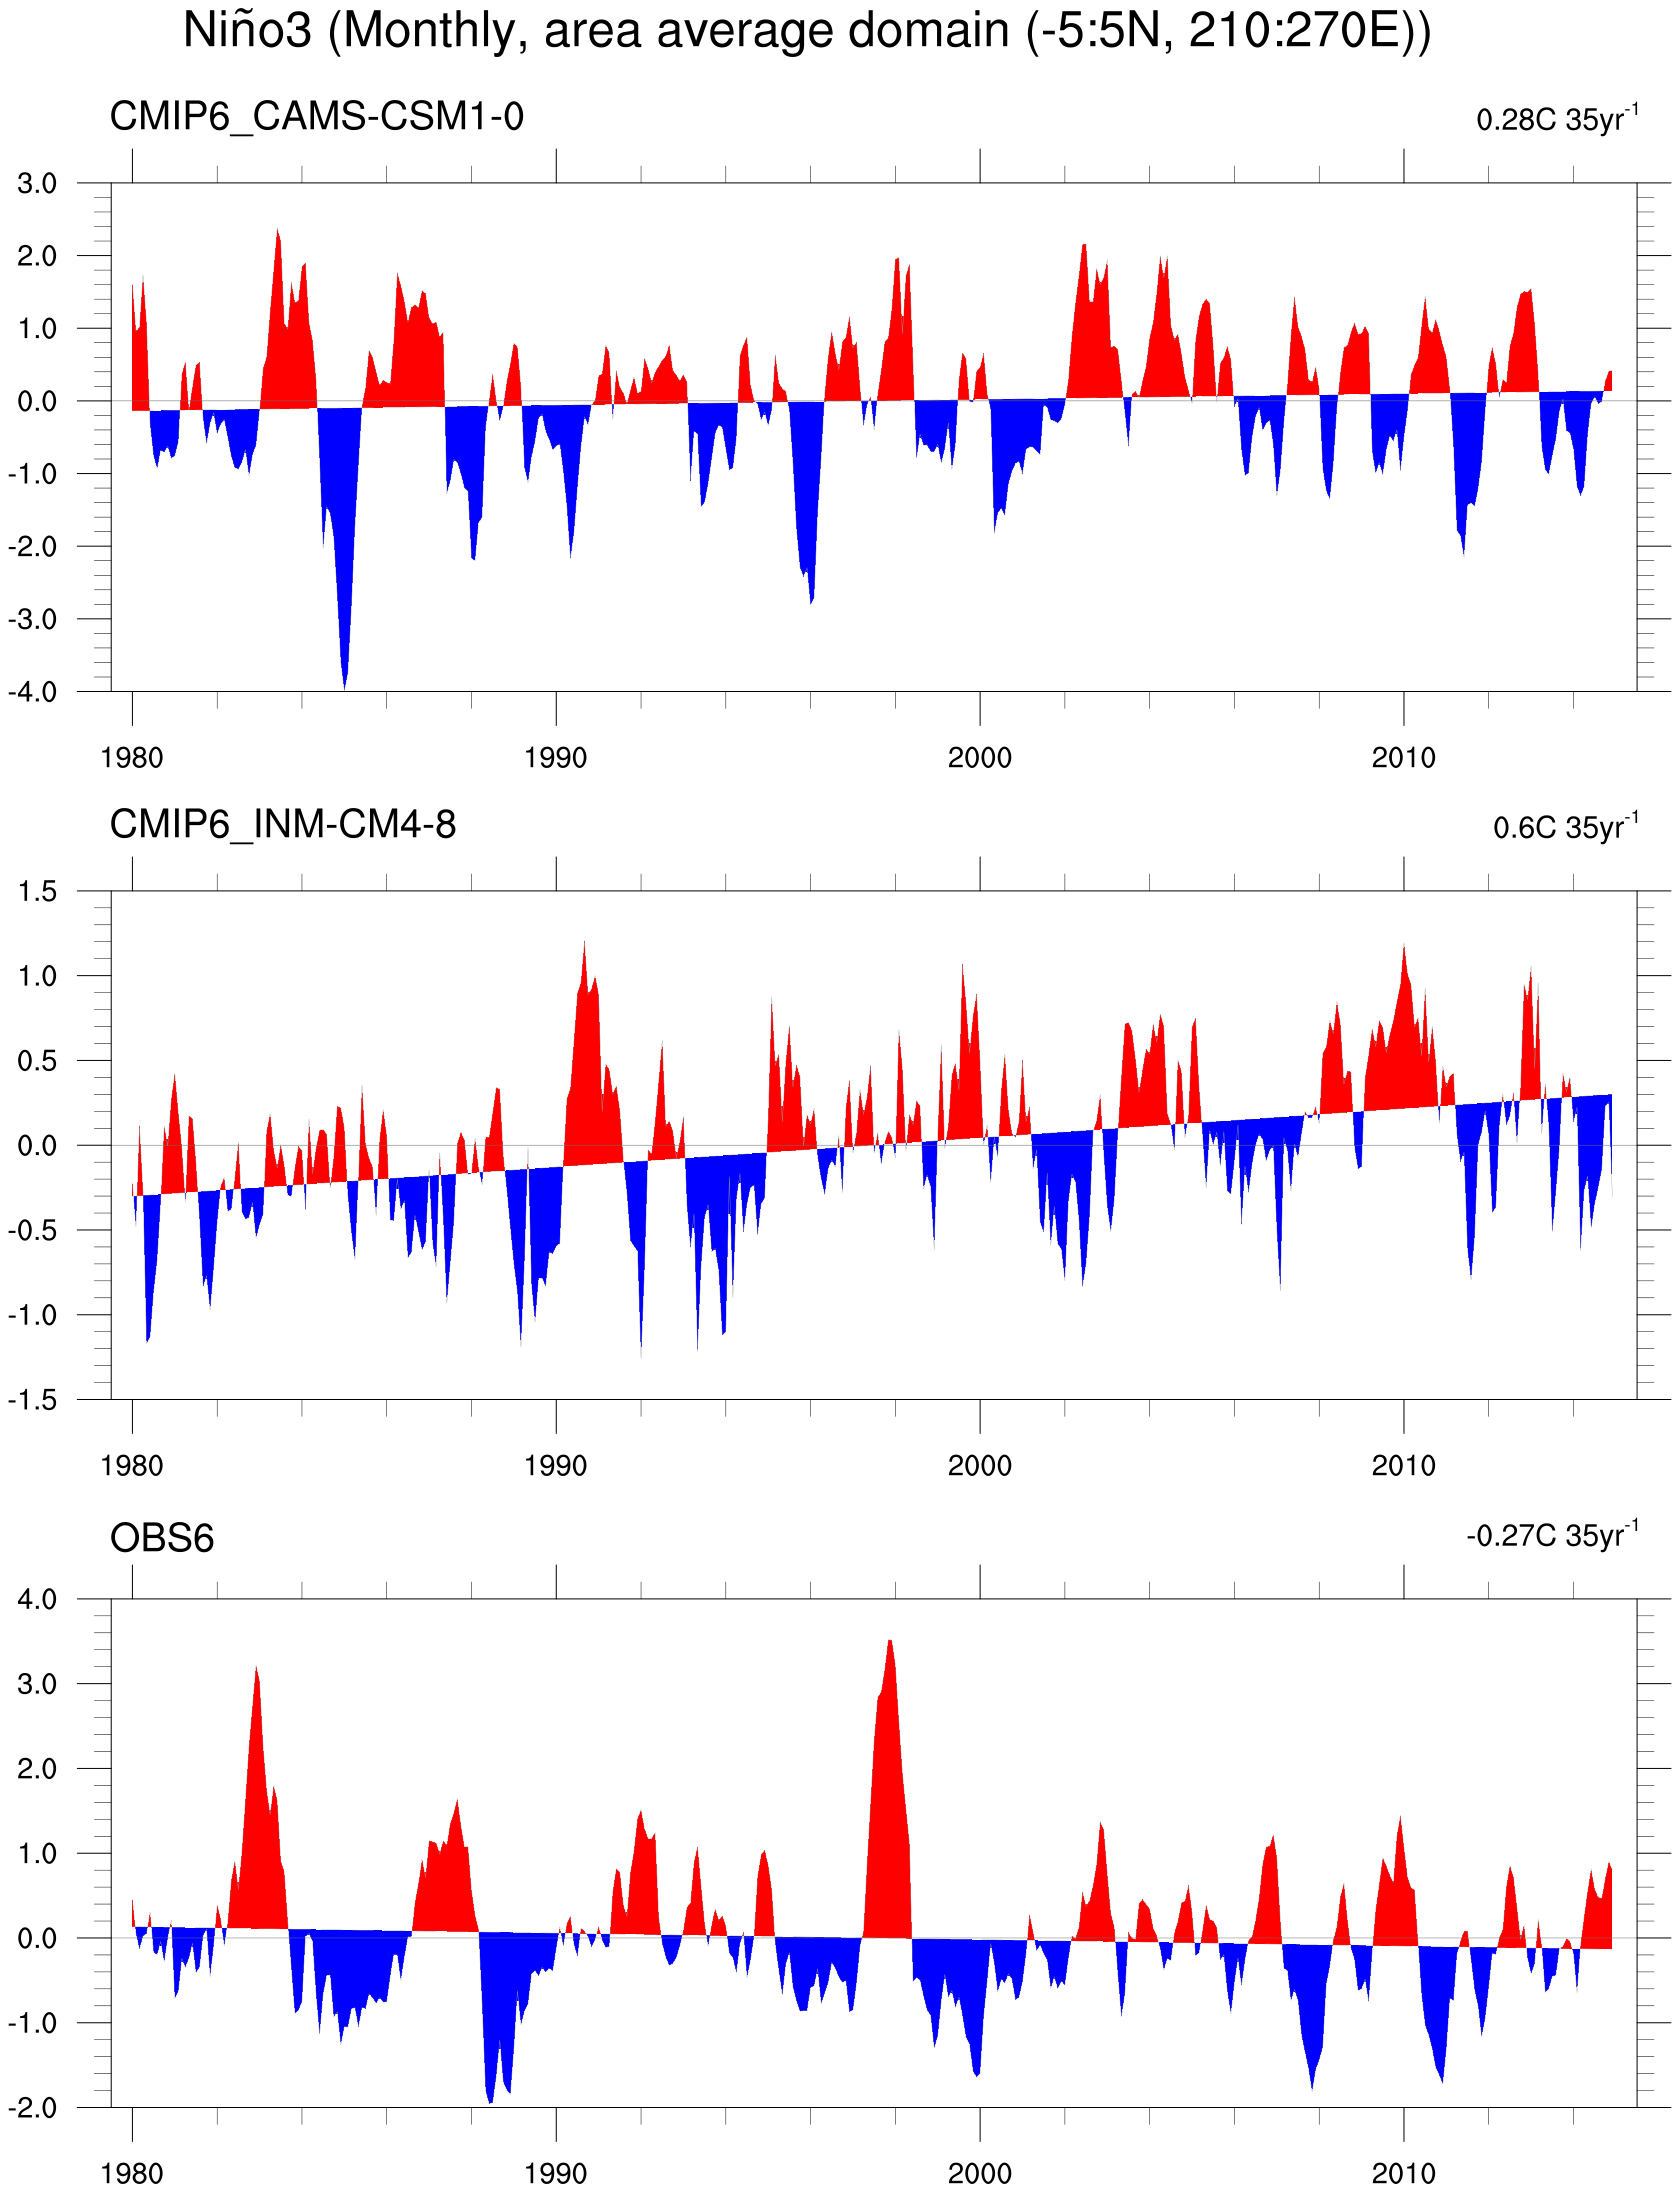

In [15]:
# Nino 3
display(Image(filename=dirname+'nino3.timeseries.png'))

**Comments:**

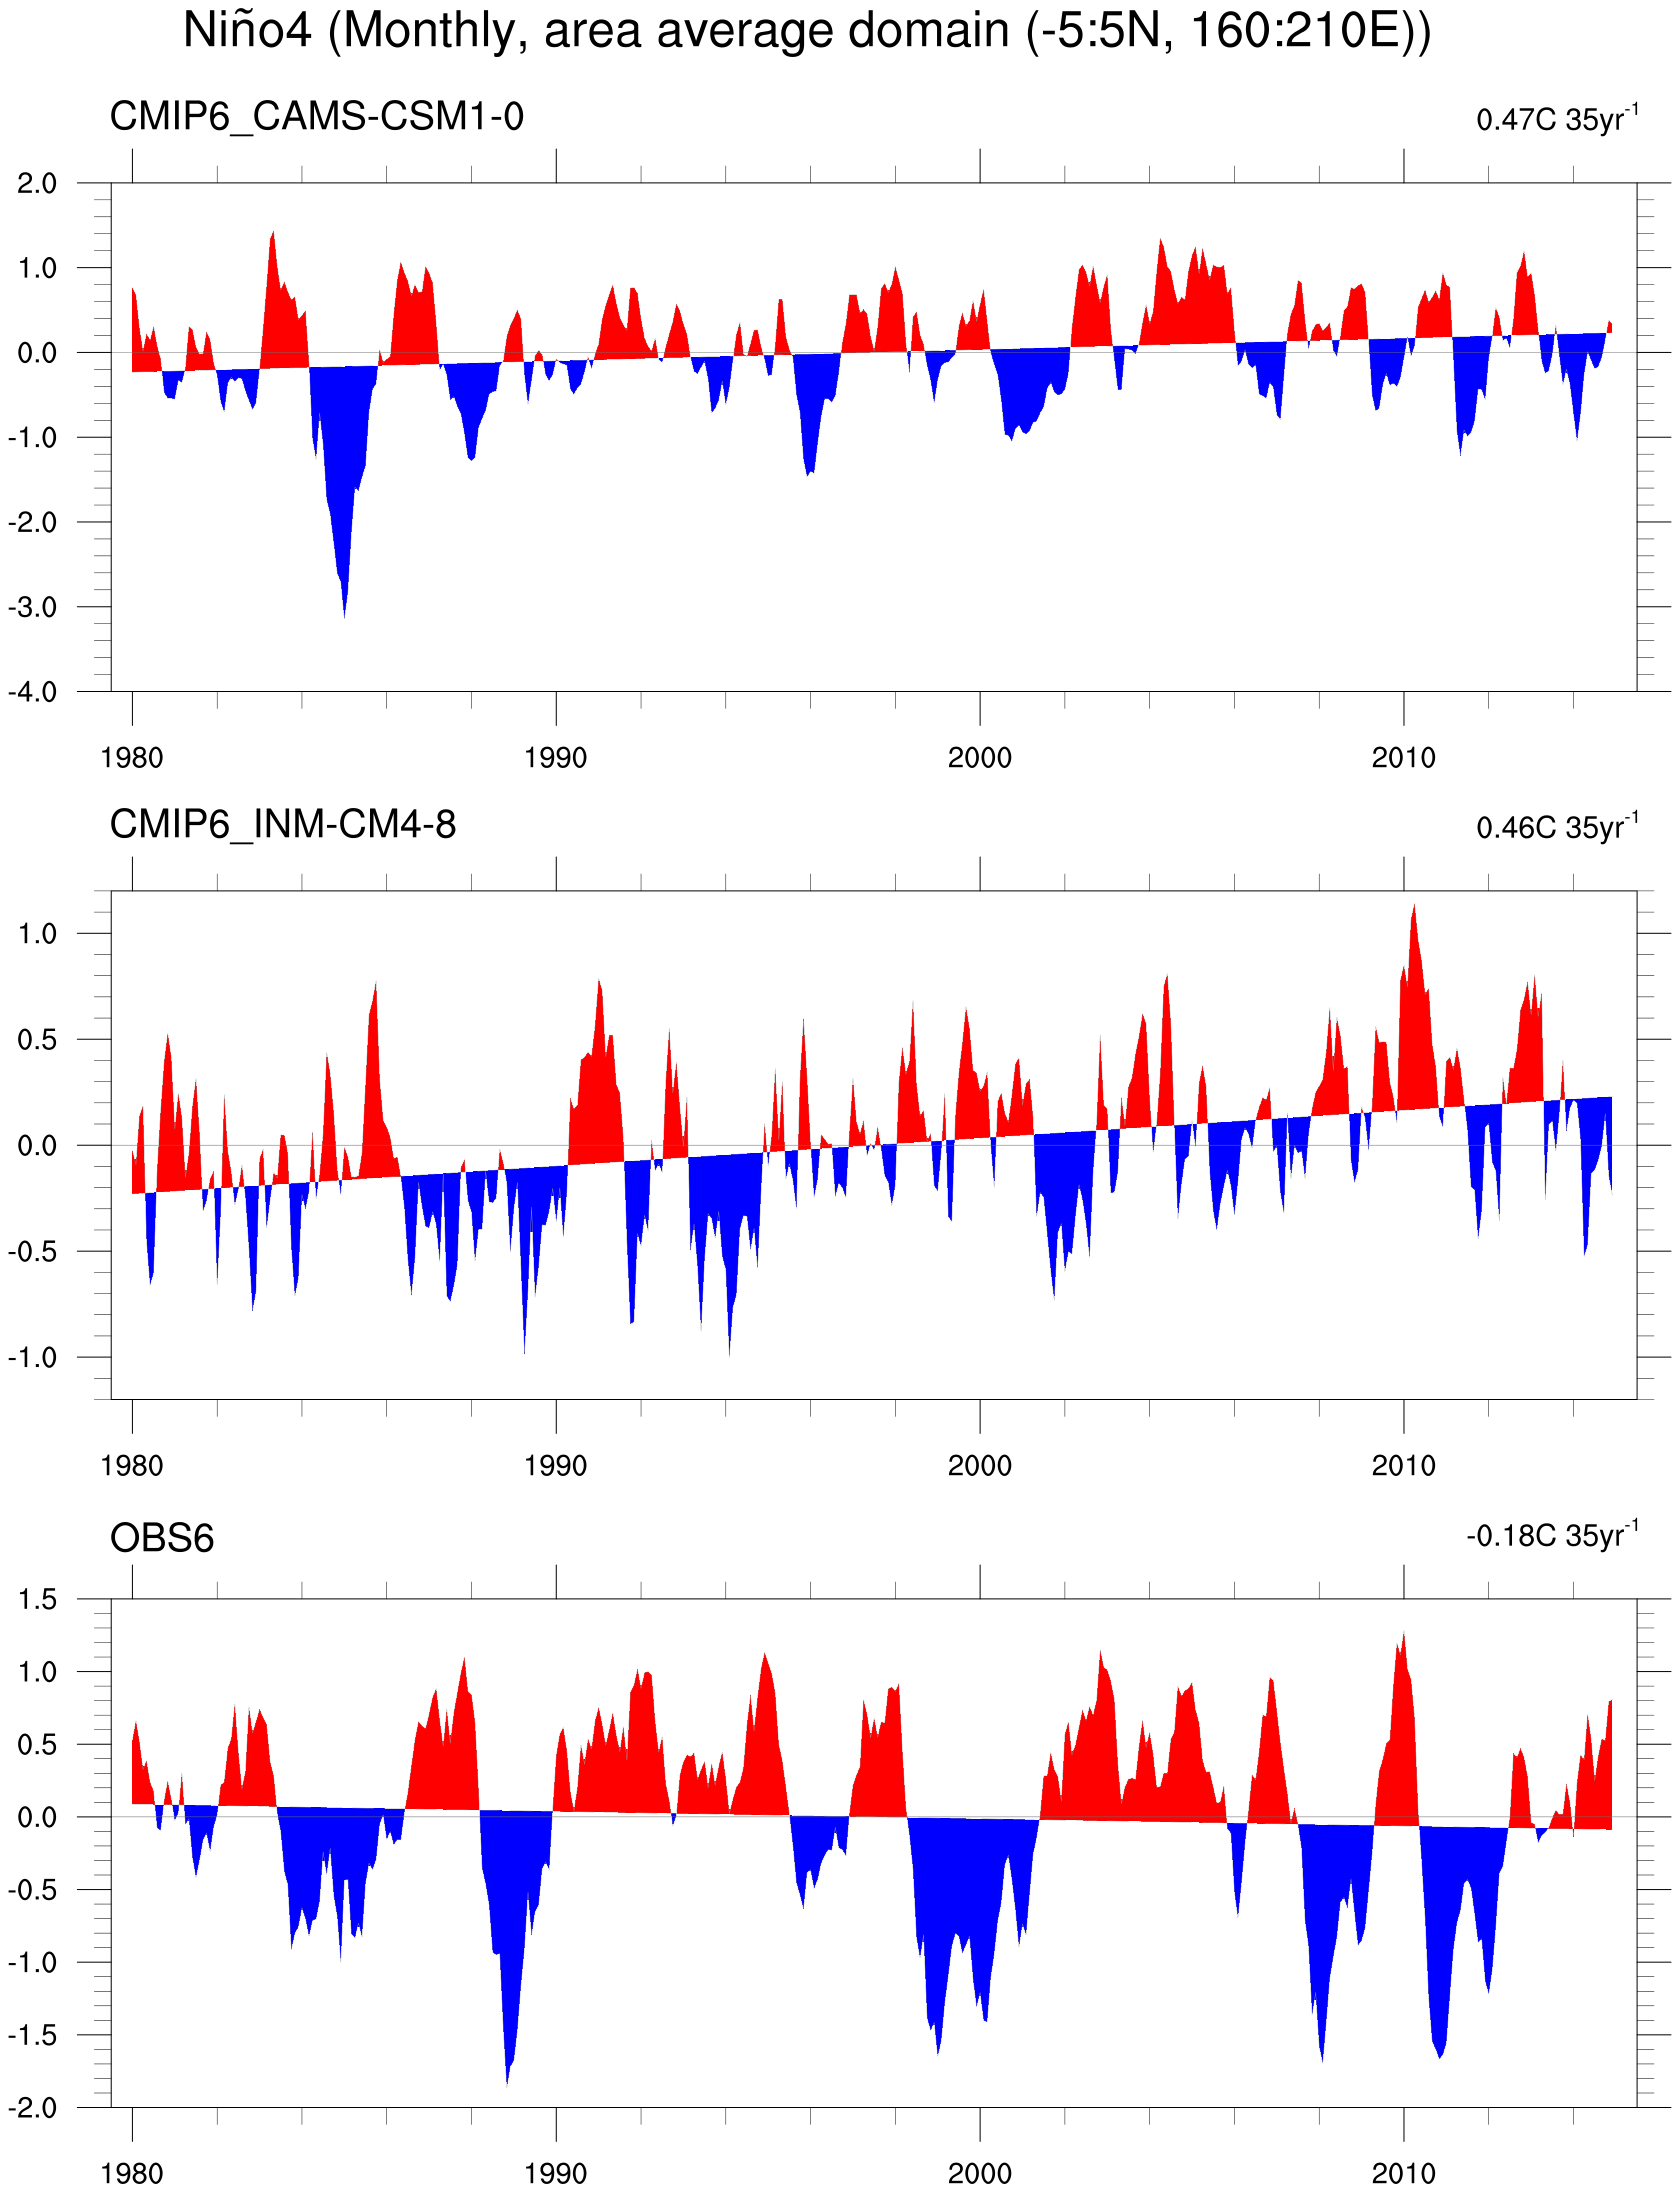

In [16]:
# Nino 4
display(Image(filename=dirname+'nino4.timeseries.png'))

**Comments:**

### T3.8. Plot the Nino 3.4 standard deviation seasonality

The needed file is ***“nino34.monstddev.png”***. Compare and comment on your GCM’s results relative to ERA-Interim. We expect that the Nino 3.4 SD should peak around the Northern Hemisphere winter. Do you observe this seasonality? Comment on your models' results.  

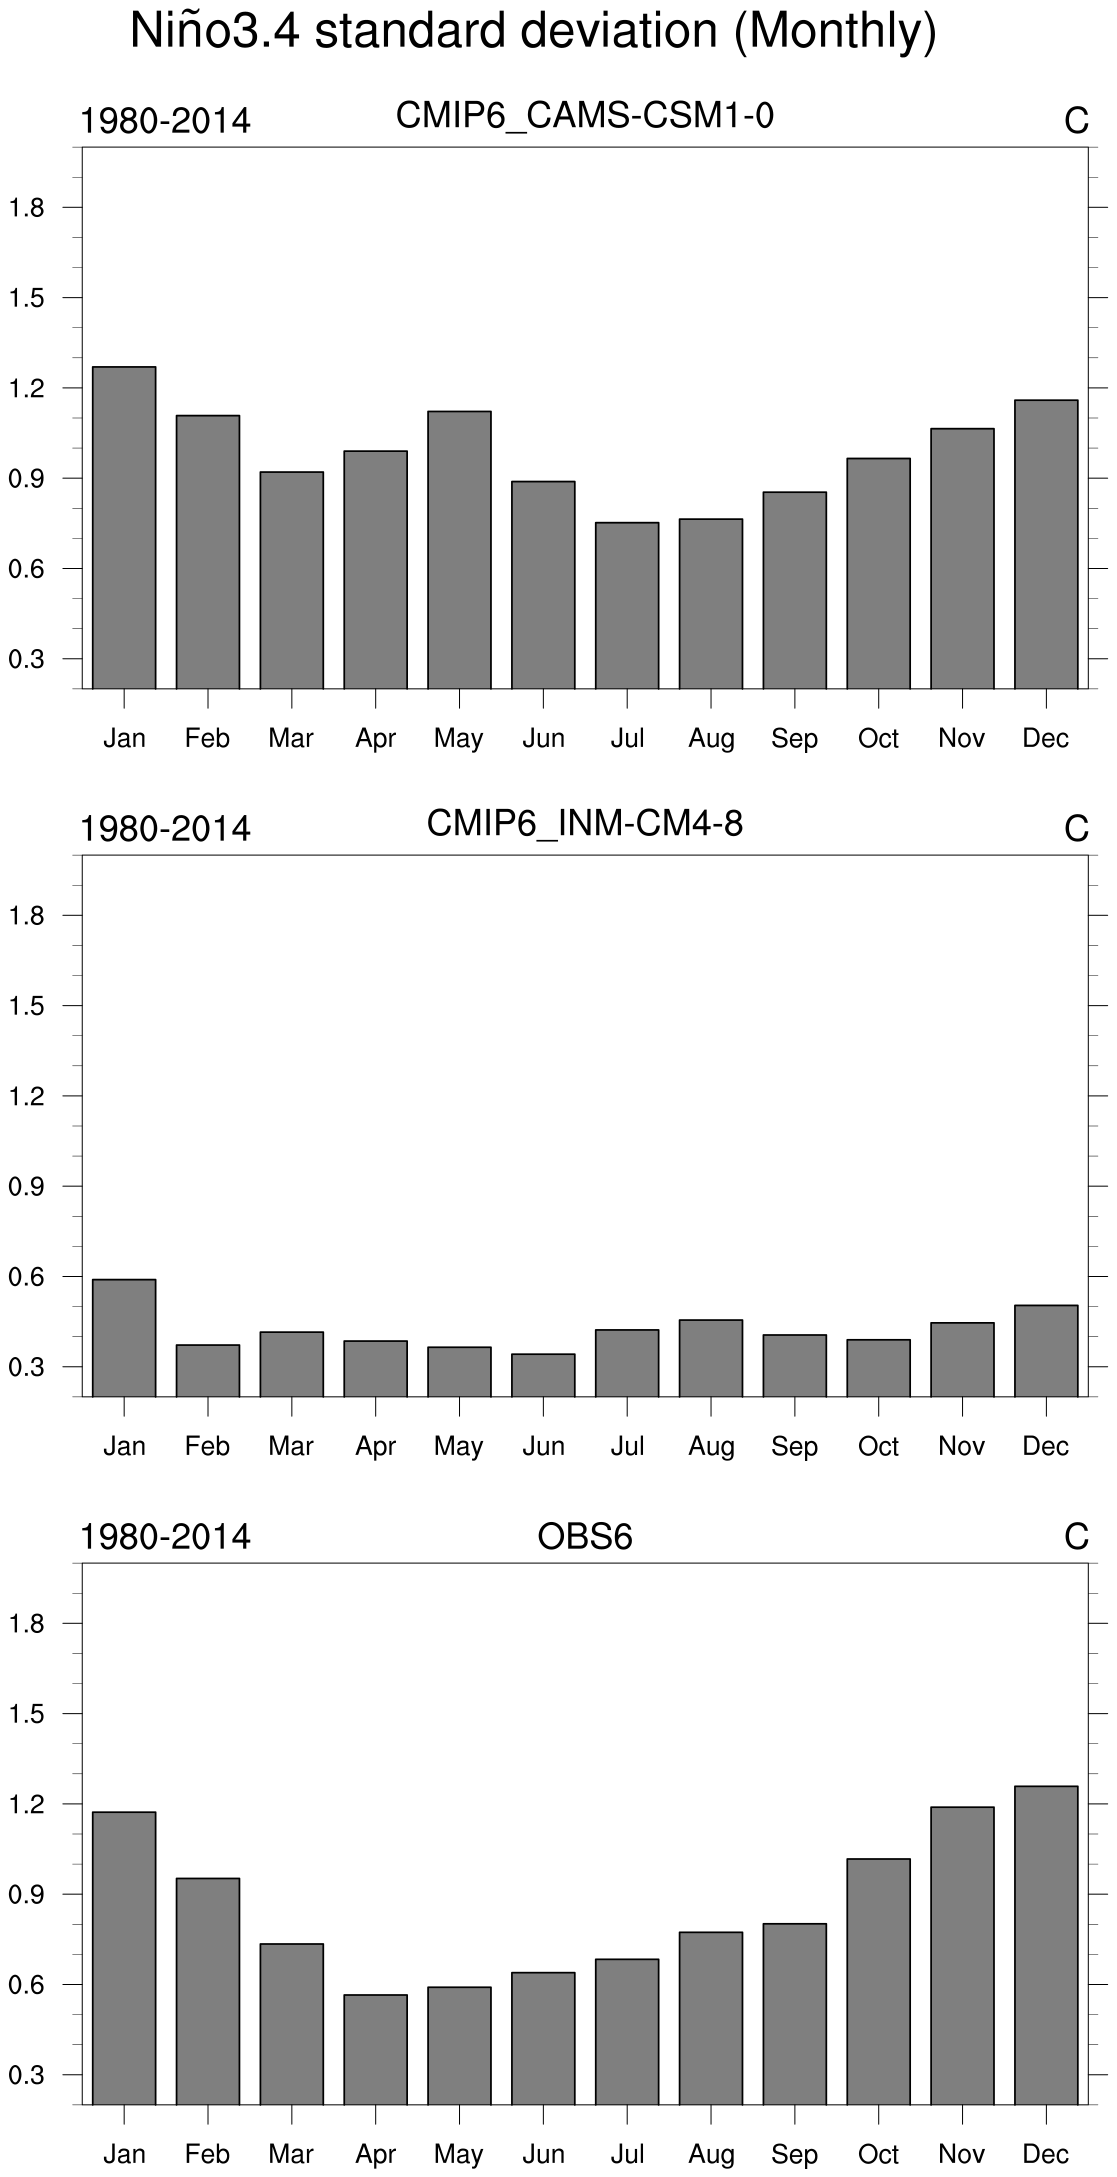

In [17]:
# Nino 3.4 STD
display(Image(filename=dirname+'nino34.monstddev.png'))

**Comments:**

### T3.9. Plot the Nino 3.4 El Nino and La Nina Hovmoeller composites and comment on your results. 

1. The needed files are ***“nino34.hov.elnino.png”*** and ***“nino34.hov.lanina.png”***. 

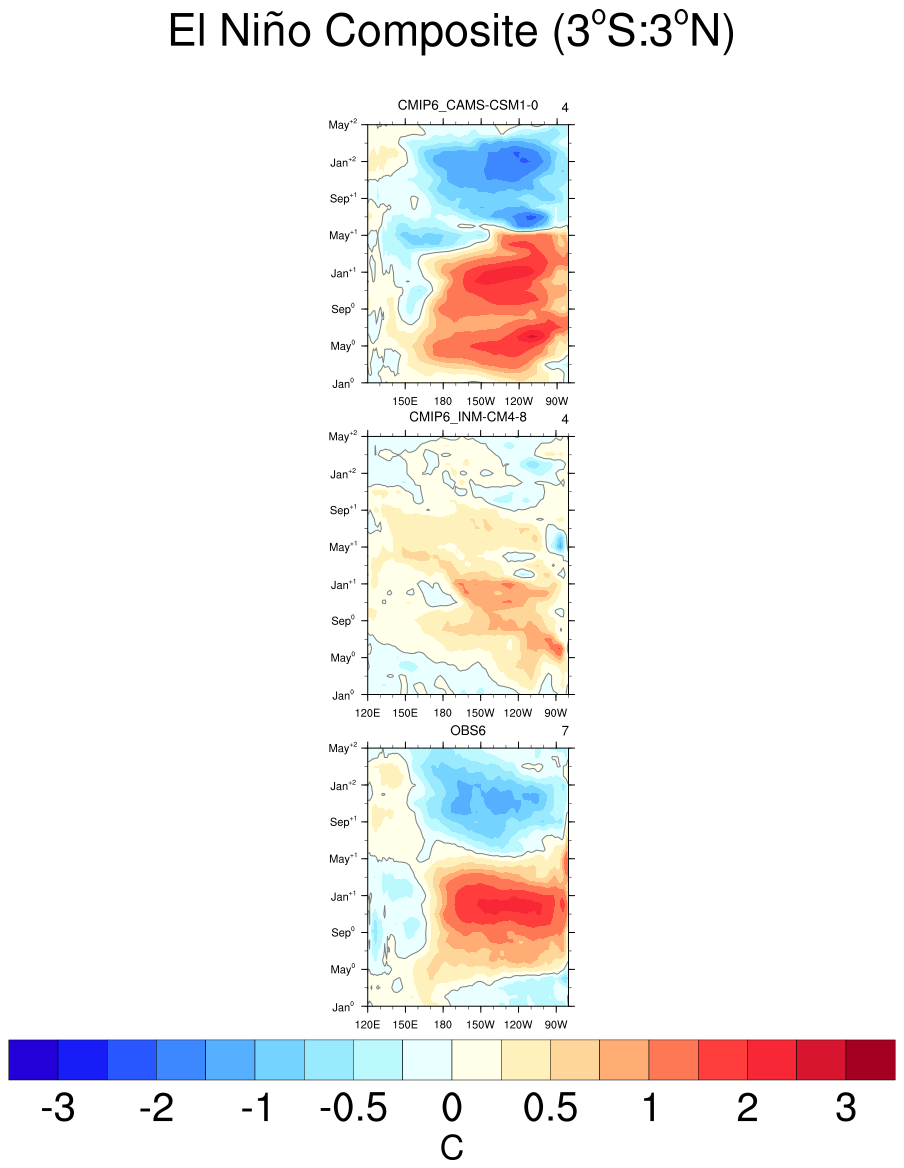

In [18]:
# Nino 3.4 El Nino Hov
display(Image(filename=dirname+'nino34.hov.elnino.png'))

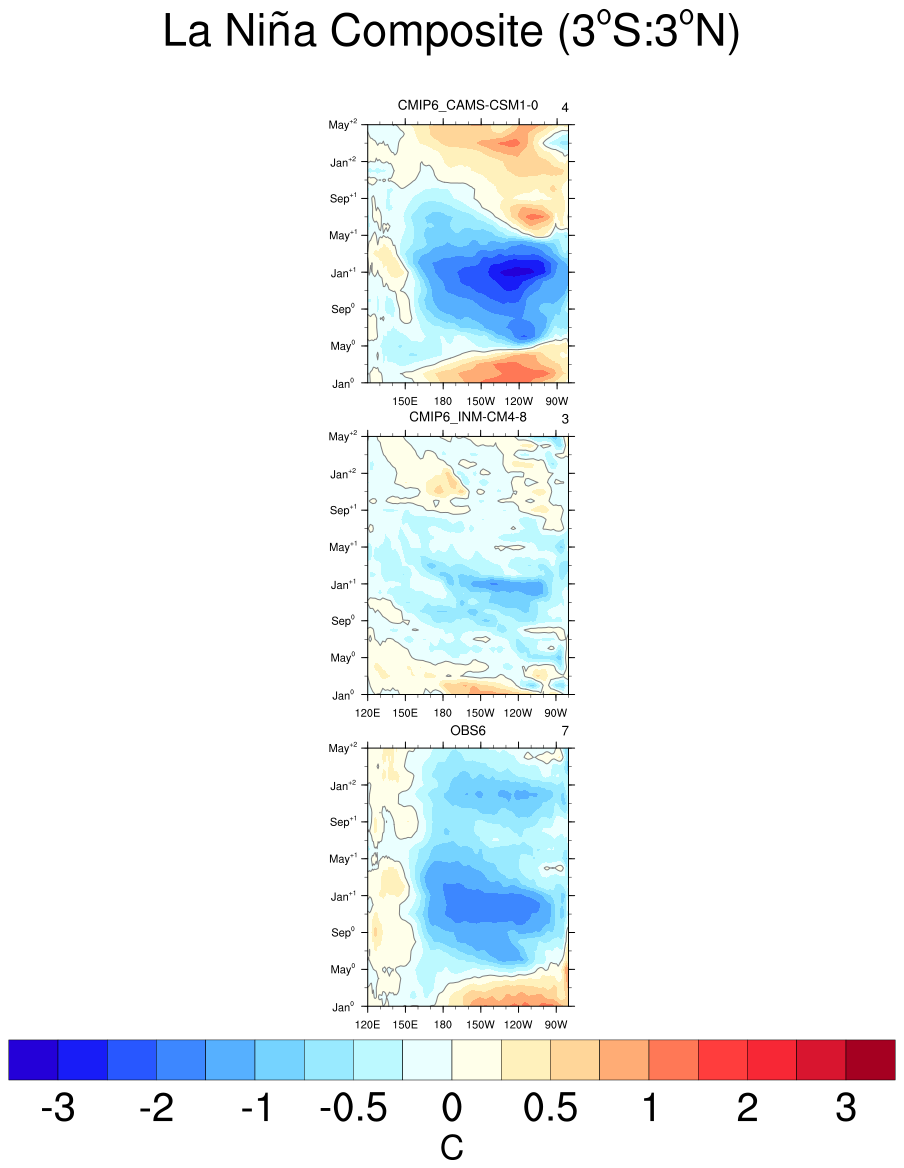

In [19]:
# Nino 3.4 La Nina Hov
display(Image(filename=dirname+'nino34.hov.lanina.png'))

---
### Indian Ocean Dipole 
---

### T3.10. Plot the IOD time series for your GCMs and ERA-Interim


This plot should be titled ***“iod.timeseries.png”***. Comment on the time series and trends (given on the top right corner of the plots). 

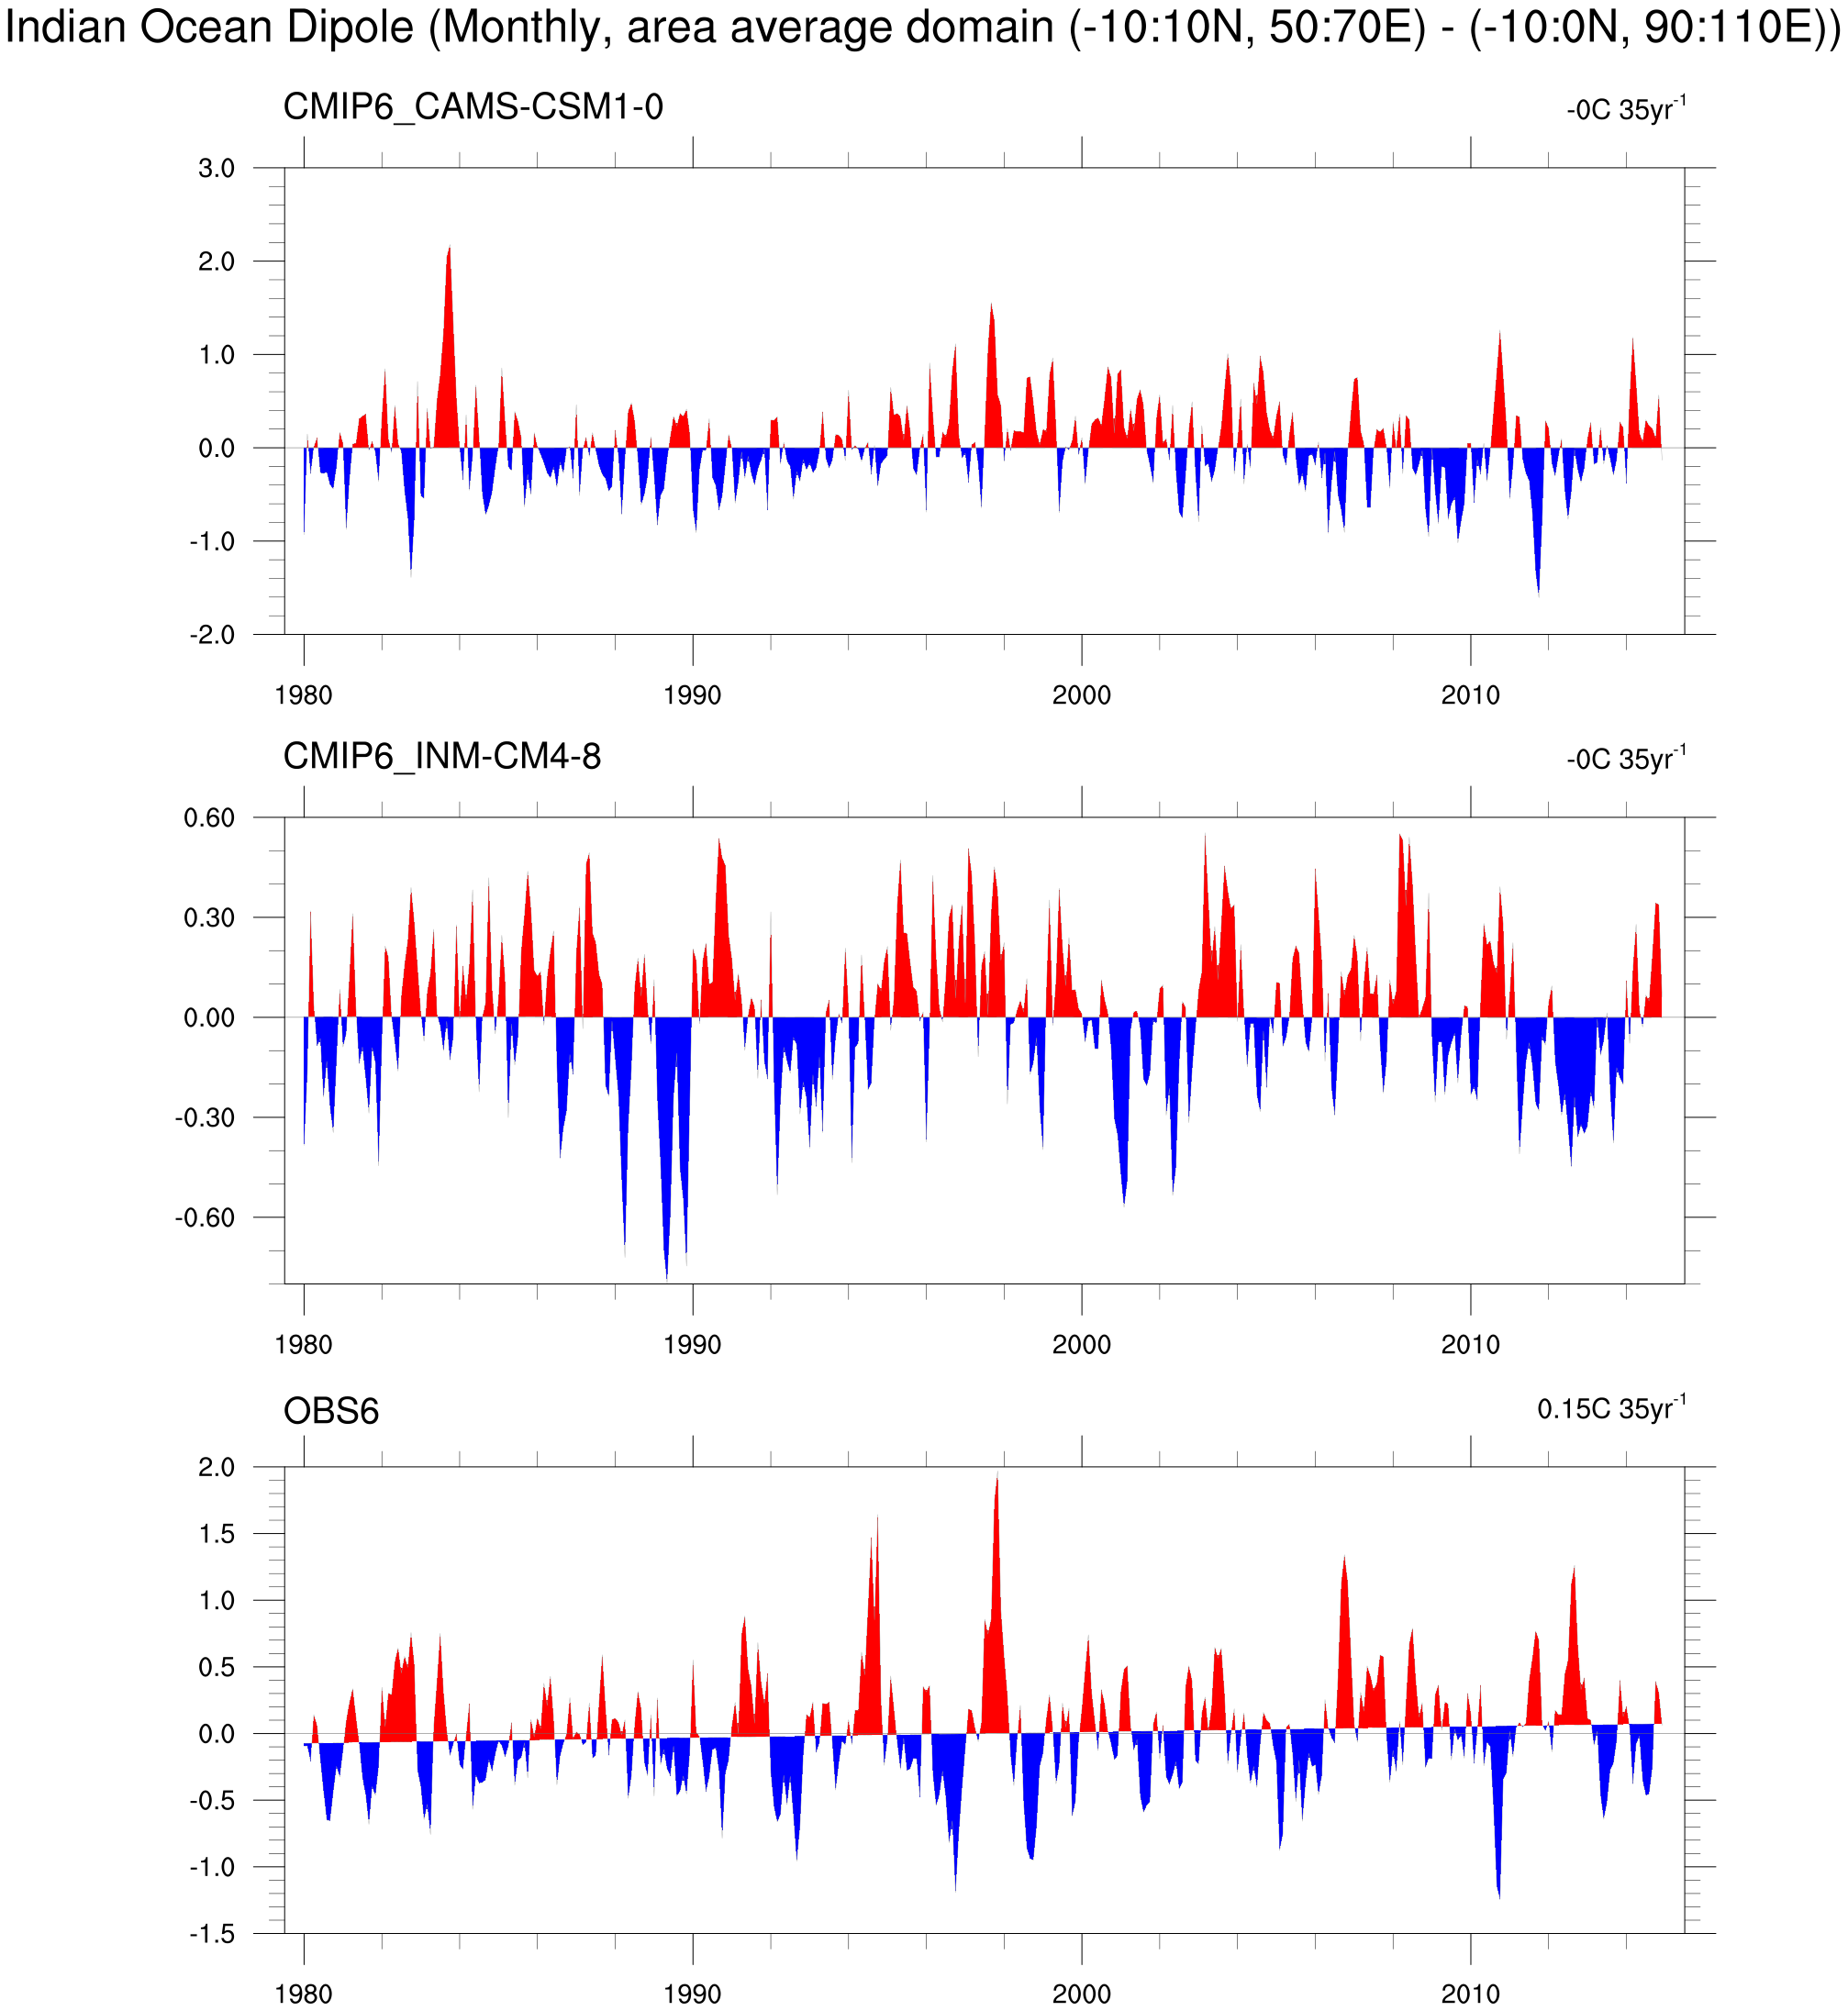

In [20]:
#IOD
display(Image(filename=dirname+'iod.timeseries.png'))

**Comments:**



---

In [ ]:
# end of file, Gerald, last edited 21/1/2020.